<a href="https://colab.research.google.com/github/XingxinHE/Python-for-Data-Analysis-Notes/blob/master/9_1_A_Brief_matplotlib_API_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
%matplotlib inline
#Google colab不支持 %matplotlib notebook 或者 %matplotlib  这些interactive的plotting，
#inline是static的

In [22]:
import matplotlib.pyplot as plt

In [23]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

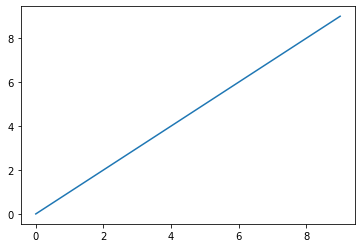

In [24]:
plt.plot(data)
#一个简单的可视化

## Figure and Subplots

In [25]:
#matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure：
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

怎么理解这个figure呢？就好比我们AI或者ID，我们新建了一个图框，但是这个图框还没有内容

In [26]:
#所以以下是加内容
ax1 = fig.add_subplot(2, 2, 1) #add_subplot的输入是（row, column, index)
#所以以上的意思是，一个图框（figure）有2*2个图，该ax1图是index为1的图（在matplotlib里面，index为1是起始位）
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

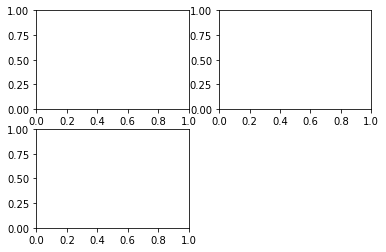

In [27]:
fig #所以你会看到这个图框多了三个图

使用 Jupyter 笔记本的一个细微差别是，在每个单元格被评估后，绘图会被重置，所以对于更复杂的绘图，**你必须把所有的绘图命令放在一个笔记本单元格中**。

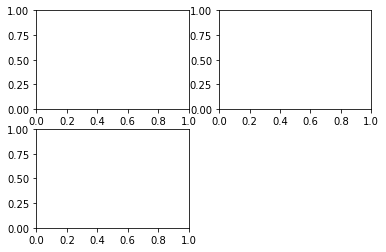

In [28]:
#如果把所有绘图命令弄一起，就会自动弹出来那个fig
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

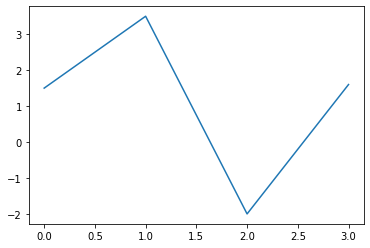

In [29]:
plt.plot([1.5, 3.5, -2, 1.6])
# 如果单独得在cell外执行这个plot画图命令，则结果和上面的figure无关，都是临时创建出来的

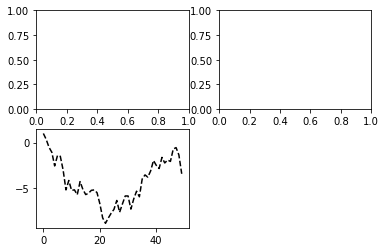

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

#把绘图命令放到同一个cell，那么所有图会同时出
#另外，plot的这个function会直接在最后一个图上绘制（为何如此？因为没有最下面那个代码没有规定plot是在哪儿plot，
#所以自动选择最后一个ax3
plt.plot(np.random.randn(50).cumsum(), 'k--') #k代表black， --代表dashed line，所以k--是黑色的dashed line

In [32]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3) #因为指定了是ax1

In [33]:
ax2.scatter(np.arange(30), np.arange(30) + 3*np.random.randn(30)) #因为指定了是ax2

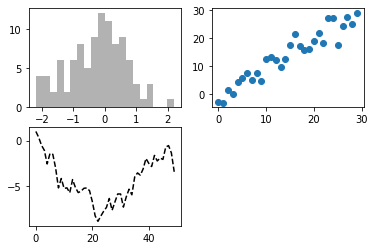

In [34]:
fig

上文提及创建subplot到figure（图框）的方法都是

1#先命名创建一个图框figure

2#然后往图框里面加图（ax）


那么有没有更方便的方法创建这种矩阵的plot呢？


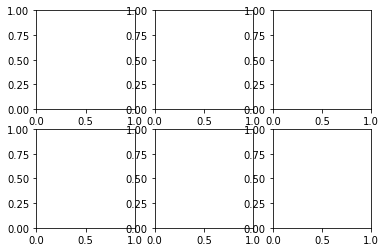

In [36]:
#matplotlib为我们创建了这种快速简洁的方法
fig, axes = plt.subplots(2, 3) #2 rows, 3 columns

In [38]:
#可以像np或者pd一样调用哪个plot了
#例如
axes[0, 2] #第0排，第2column

### Adjusting the spacing around subplots

In [40]:
#调整间距可用以下格式代码：
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

<Figure size 432x288 with 0 Axes>

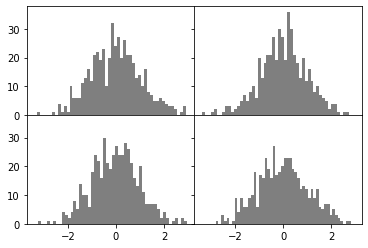

In [41]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True) #创建一个2*2的figure，share x,y axis
for i in range(2):
  for j in range(2): #nested for loop, 来iterate axes的index
    axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0) #让axes都没有边缘留白

## Colors, Markers, and Line Styles

In [44]:
# 通常的plot会有这种格式， ax.plot(x,y,'g--')， 你会好奇什么是 g--
# 上面的等效于 ax.plot(x, y, linestyle='--', color='g')
#所以g--是 green dashed line的意思

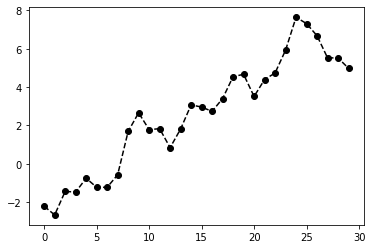

In [47]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')
#cumsum是累加，比如1，3，4，5 cumsum之后就是 1，4，8，13
#所以这个cumsum实际上就是增加x轴的长度，让它维持在30，原本是独立的事件

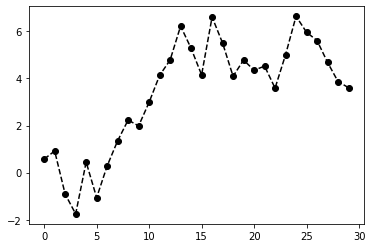

In [48]:
#上面的ko-- 即为下面的这个解释
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [55]:
data = np.random.randn(30).cumsum()

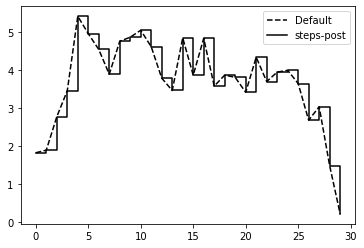

In [54]:
#对比两种plot
plt.plot(data, 'k--', label='Default') #label是区分不同的plot的一个方法
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post') #drawstyle
plt.legend(loc='best') #legend的位置

## Ticks, Labels, and Legends

刻度，标签和图例

plt.xlim([0,10])把x limits在某特定范围

### Setting the title, axis labels, ticks, and ticklabels

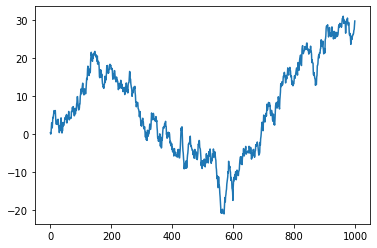

In [56]:
#创建一个平平无奇的plot，为base
fig = plt.figure()
ax = fig.add_subplot(1,1,1) #创建一个1*1的图，序号为1
ax.plot(np.random.randn(1000).cumsum()) #cumsum

基于上图的plot做以下操作：

以下为设置title, axis labels,ticks, 和ticklabels

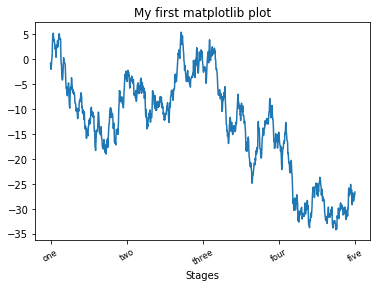

In [62]:
#1 创建一个figure和ax
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#2 设置tick, labels属性
ticks = ax.set_xticks([0, 250, 500, 750, 1000]) #tick是什么呢？有点像priemer的mark，就是在特定的值mark一下，这里mark了5个数值
labels = ax.set_xticklabels(['one','two','three','four','five'], rotation=30, fontsize='small') #ticklabels，顾名思义，对上面mark的数值转化为label,这对数字->文字有显著的效果
ax.set_title('My first matplotlib plot') #设置该plot的名字
ax.set_xlabel('Stages') #x坐标的label

#3plot
ax.plot(np.random.randn(1000).cumsum()) #cumsum

In [63]:
#下面这种方法更加牛批，把一些属性properties集合成一个字典
props = {
  'title': 'My first matplotlib plot',
  'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

### Adding legends

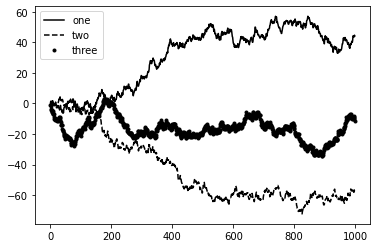

In [64]:
#因为需要常常用到
from numpy.random import randn 

#创建一个figure&axe
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

#plot，三个plot不同的线型，不同的label
#若不选有legend，可以label='_nolegend_'
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

#创建legend，位置系统自动选择最佳位置
ax.legend(loc='best')

## Annotations and Drawing on a Subplot

自定义添加annotation的syntax如下：

ax.text(x, y, 'Hello world!',
    family='monospace', fontsize=10)

其中x,y为coordinate

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

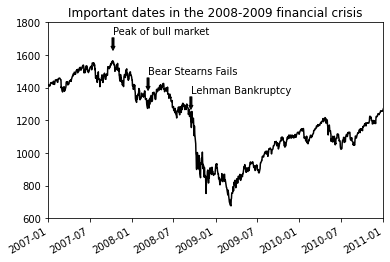

In [71]:
#以下做一个demo

#1 import package
from datetime import datetime

#2 创建一个figure和axe
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#3 load数据
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv'
data = pd.read_csv(url, index_col=0, parse_dates=True)
spx = data['SPX']

#4 plot
spx.plot(ax=ax, style='k-')

crisis_data = [
  (datetime(2007,10,11), 'Peak of bull market'),
  (datetime(2008,3,12), 'Bear Stearns Fails'),
  (datetime(2008,9,15), 'Lehman Bankruptcy')
]

#5 设置好labels
for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date)+75),
        xytext=(date, spx.asof(date)+225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
        horizontalalignment='left', verticalalignment='top')
  
#6 钳制在某个值域plot
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

#7 设置title
ax.set_title('Important dates in the 2008-2009 financial crisis')

绘制shapes

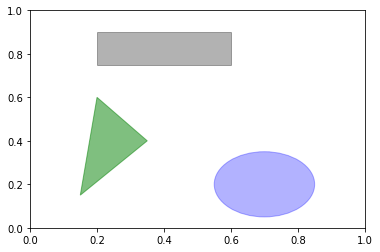

In [72]:
#1 创建fig和axe
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#2 命名各种geo
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

#3 将geo patch
        #！！注意，patch refer to matplotlib common shape
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## Saving Plots to File

因为我在这里用的是colab所以保存到虚拟电脑了

In [73]:
# plt.savefig('文件名') 是保存plot的方式
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

In [74]:
#还可以保存pdf, png, etc
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

## matplotlib Configuration

使用.rc来customize matplotlib的配置，诸如图像大小、subplot边距、配色
方案、字体大小、网格类型等

In [75]:
#例如这个设置图像大小
plt.rc('figure', figsize=(10,10))

把设置写入一个字典，然后来设置

In [78]:
font_options = {'family':'monospace',
         'weight':'bold',
         'size':12}
plt.rc('font', **font_options)